## 3.8. pseudotime with and without intercept plot

In this notebook we compare the pseudtime calculated with and without intercept. The pseudotime is calculated in R script 3.1., per default without intercept and commenting out line 49 gives the result with intercept. The output was saved in the file `results/pseudotime/pseudotime_w_wo_intercept_cells.csv` on the Github repository.

In [36]:
### load libraries

# standard libraries
import numpy as np
import pandas as pd
from scipy.stats import spearmanr
np.random.seed(1)

# plotting libraries 
from matplotlib import pyplot as plt
plt.rcParams['pdf.fonttype'] = 42 #for saving PDF with changeable text
plt.rcParams['ps.fonttype'] = 42 #for saving PDF with changeable text
import matplotlib.cm as cm #for generating colors
import anndata

### Load data

Here we load the the pseudotime as calculated in R script 3.1.

In [43]:
### load data
pseudotime = pd.read_csv("../results/pseudotime/pseudotime_w_wo_intercept_cells.csv", index_col=0)

PT_wo = pseudotime["PT.woIntercep"].tolist()
PT_with = pseudotime["PT.with"].tolist()

PT_order_wo = np.argsort(np.argsort(PT_wo))
PT_order_with = np.argsort(np.argsort(PT_with))

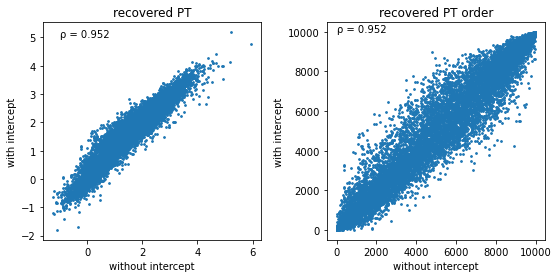

In [44]:
### plot true order versus recovered order
fig, ax = plt.subplots(1,2,figsize=(9,4), gridspec_kw={'wspace':0.3})

ax[0].scatter(PT_wo, PT_with, s=3)
ax[0].set(xlabel='without intercept', ylabel='with intercept')
spearman_corr, _ = spearmanr(PT_wo, PT_with) #calculate corr.
ax[0].text(-1, 5, f'ρ = {spearman_corr:.3f}')
ax[0].title.set_text("recovered PT") #add title


ax[1].scatter(PT_order_wo, PT_order_with, s=3)
ax[1].set(xlabel='without intercept', ylabel='with intercept')
spearman_corr, _ = spearmanr(PT_order_wo, PT_order_with) #calculate corr.
ax[1].text(1, 10000, f'ρ = {spearman_corr:.3f}')
ax[1].title.set_text("recovered PT order") #add title

# save figure
save_path = "../figures/3.8.PT_intercept_vs_no_intercept.pdf"
fig.savefig(save_path, bbox_inches='tight', format='pdf', dpi=300)

plt.show()